In [1]:
import pandas as pd
import numpy as np

file_path="G:/ML Project 1/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path) 

In [2]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**EDA**

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df['Final Result'] = df['Exam_Score'].apply(lambda score: 1 if score >= 50 else 0)

In [10]:
df["Final Result"].value_counts()

Final Result
1    6607
Name: count, dtype: int64

**Visualization**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

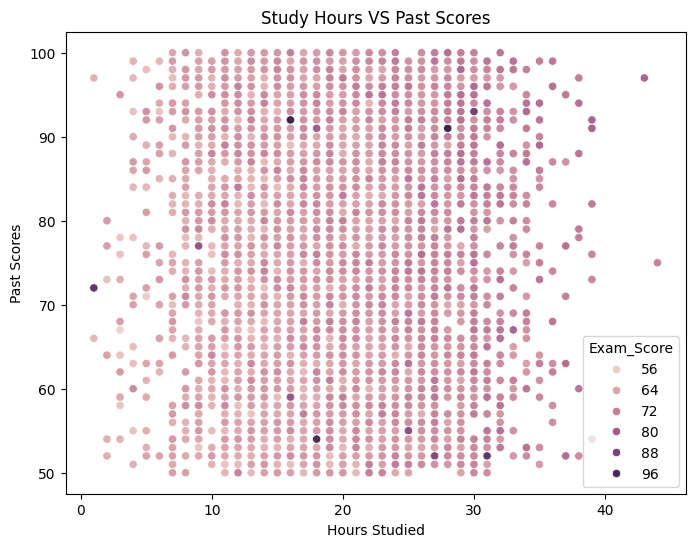

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hours_Studied", y="Previous_Scores", hue="Exam_Score", data=df)
plt.title("Study Hours VS Past Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Past Scores")
plt.show()

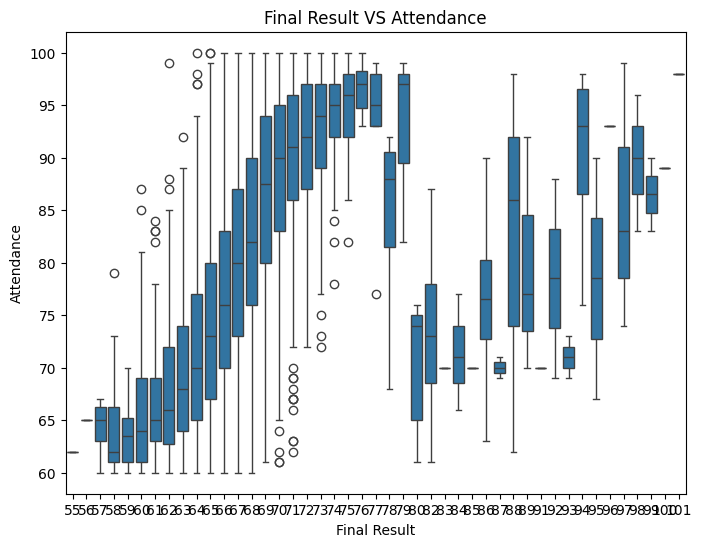

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Exam_Score", y="Attendance", data=df)
plt.xlabel("Final Result")
plt.ylabel("Attendance")
plt.title("Final Result VS Attendance")
plt.show()

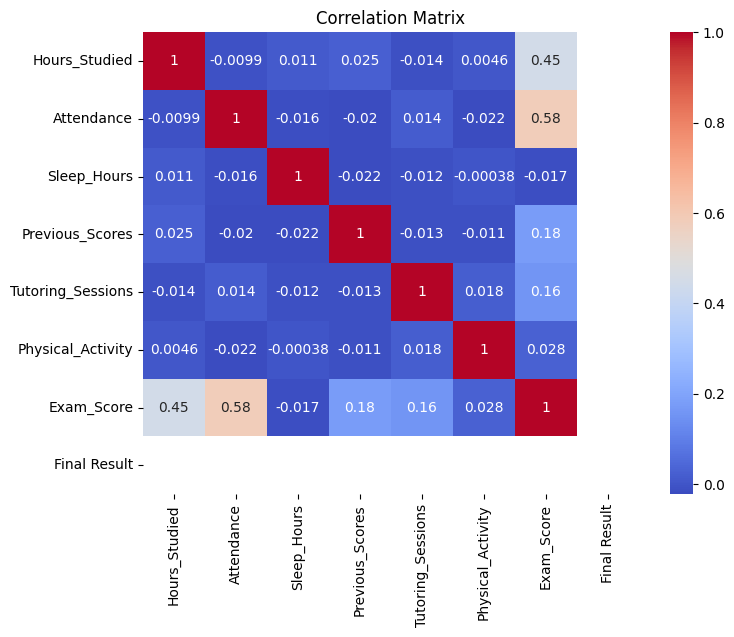

In [27]:
import numpy as np
numeric_df=df.select_dtypes(include=[np.number])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Model Training**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


In [ ]:
X = df.drop(["Sleep_Hours", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"], axis=1)
y = df['Exam_Score'].apply(lambda score: 1 if score >= 70 else 0)
print(y.value_counts())
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set class distribution:")
print(y_train.value_counts())

# Model Training and Prediction
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Exam_Score
0    4982
1    1625
Name: count, dtype: int64
Training set class distribution:
Exam_Score
0    3985
1    1300
Name: count, dtype: int64
Confusion Matrix:
 [[965  32]
 [ 50 275]]

Accuracy Score: 0.9379727685325264

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       997
           1       0.90      0.85      0.87       325

    accuracy                           0.94      1322
   macro avg       0.92      0.91      0.91      1322
weighted avg       0.94      0.94      0.94      1322



**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier

df_clf = DecisionTreeClassifier(random_state=42)
df_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", df_clf)
])
df_pipeline.fit(X_train, y_train)
y_pred_df = df_pipeline.predict(X_test)
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_df))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_df))
print("\nClassification Report:\n", classification_report(y_test, y_pred_df))

Confusion Matrix:
 [[888 109]
 [106 219]]

Accuracy Score: 0.8373676248108926

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       997
           1       0.67      0.67      0.67       325

    accuracy                           0.84      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.84      0.84      0.84      1322



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_clf)
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[980  17]
 [130 195]]
Accuracy Score: 0.8888048411497731

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       997
           1       0.92      0.60      0.73       325

    accuracy                           0.89      1322
   macro avg       0.90      0.79      0.83      1322
weighted avg       0.89      0.89      0.88      1322



In [68]:
import joblib
joblib.dump(rf_model, 'Student_Performance_Analyser.joblib')
print("Random Forest model saved as 'Student_Performance_Analyser.joblib'")

Random Forest model saved as 'Student_Performance_Analyser.joblib'


**Streamlit App**

In [69]:
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('Student_Performance_Analyser.joblib')

st.title("Student Performance Prediction")
study_hours = st.number_input("Hours_Studied", min_value=0.0, max_value=44.0, value=23.0)
attendance = st.number_input("Attendance", min_value=0, max_value=100, value=84)
past_grade = st.number_input("Previous_Score", min_value=0, max_value=100, value=73)
exam_score = st.number_input("Exam_Score", min_value=0, max_value=101, value=67)


input_data = pd.DataFrame([[study_hours, attendance, past_grade, exam_score]],
                          columns=['Study_Hours', 'Attendance', 'Past_Grade', 'Exam_Score'])

if st.button("Predict"):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.success("The student is predicted to Pass.")
    else:
        st.error("The student is predicted to Fail.")

2025-05-10 21:43:28.174 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.738 
  command:

    streamlit run C:\Users\Rimjhim\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-10 21:43:28.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 21:43:28.753 Se